# Задание 1. Функции

In [ ]:
# Задание 1. Функции
# Написать не возвращающую значение функцию, которая изменяет список, переданный в качестве параметра, в соответствии с заданием
# 13. все элементы кратные 3, стоящие перед отрицательными, увеличить на 9.
def change_list(cur_list):
  for i in range (len(cur_list) - 1):
    if (cur_list[i] % 3 == 0 and cur_list[i + 1] < 0):
      cur_list[i] += 9

# 0 -9 -9 4 7 8 3 -6 -7 6 0 -9
cur_list = list(map(int, input().split(' ')))
print("Исходный список", cur_list)
change_list(cur_list)
print("Измененный список", cur_list)

0 -9 -9 4 7 8 3 -6 -7 6 0 -9
Исходный список [0, -9, -9, 4, 7, 8, 3, -6, -7, 6, 0, -9]
Измененный список [9, 0, -9, 4, 7, 8, 12, 3, -7, 6, 9, -9]


# Задание 2. Модуль random

In [ ]:
# Задание 2. Модуль random
from string import digits, ascii_lowercase, ascii_letters
from random import choices

# id — случайное пятизначное число,
# 13) сумма трёх средних цифр id равна сумме двух крайних,
def generate_id():
  possible_id_lst = [1, 2, 3, 4, 5]
  lst_of_digits = [int(x) for x in digits]
  while (sum(possible_id_lst[1:4:]) != sum(possible_id_lst[0::4])):
    possible_id_lst = choices(lst_of_digits, k=5)
  return ''.join([str(x) for x in possible_id_lst])

# логин — случайная последовательность из 6 маленьких английских букв,
# 13) в логине никакая буква не встречается больше двух раз,
def generate_login():
  possible_login = 'aaaaab'
  while(any(possible_login.count(letter) > 2 for letter in set(possible_login))):
    possible_login = ''.join(choices(ascii_lowercase, k=6))
  return possible_login

# пароль — случайная последовательность  из 10 неповторяющихся больших и маленьких английских букв и цифр
# 13) в пароле буквы не повторяются, даже если они записаны в разных регистрах,
def generate_password():
  possible_password = 'aAbBcCdDeE'
  possible_password_without_digits = 'aAbBcCdDeE'
  while len(possible_password_without_digits) != len(set(possible_password_without_digits.lower())):
    possible_password = ''.join(choices(ascii_letters + digits, k=10))
    # убираем цифры
    possible_password_without_digits = ''
    for symbol in possible_password:
      # если такого символа нет в строке цифр
      if digits.count(symbol) == 0:
        # то добавляем в строку пароля без цифр
        possible_password_without_digits += symbol
  return possible_password

# С использованием этих трёх функций напишите функцию, генерирующую список из N троек вида
# (id, логин, пароль),
# в которых ни id, ни логины, ни пароли не повторяются 
# (при этом повторный вызов функции не должен учитывать результаты предыдущей генерации).
def generate_triple():
  return generate_id(), generate_login(), generate_password()

def generate_lst(N):
  res_lst = []
  for i in range(N):
    current_triple = generate_triple()
    while(res_lst.count(current_triple) != 0):
      current_triple = generate_triple()
    res_lst.append(current_triple)
  return res_lst

def beautiful_print(lst):
  s = 41
  for i in range(s):
    print('-', end='')
  print()
  print(f'|{"№": ^3}|{"id": ^9}|{"логин": ^10}|{"пароль": ^14}|')
  for i in range(s):
    print('-', end='')
  print()
  for i in range(len(lst)):
    print(f'|{i + 1: ^3}|{lst[i][0]: ^9}|{lst[i][1]: ^10}|{lst[i][2]: ^14}|')
  for i in range(s):
    print('-', end='')
  print()

# основная программа
print("Введите количество троек: ", end='')
N = int(input())
lst_of_triples = generate_lst(N)
print("Таблица")
beautiful_print(lst_of_triples)

Введите количество троек: 5
Таблица
-----------------------------------------
| № |   id    |  логин   |    пароль    |
-----------------------------------------
| 1 |  75503  |  kzchxd  |  I1u68mfZts  |
| 2 |  99707  |  tgsyzk  |  YefVHCT52O  |
| 3 |  90988  |  cpkyhl  |  8MPYR20wXs  |
| 4 |  92586  |  gciwjl  |  7lsbHDz17w  |
| 5 |  67629  |  fxvzyx  |  Abofkxn6tj  |
-----------------------------------------


# Задание 3. Модуль csv

In [ ]:
# Задание 3. Модуль csv
from csv import DictReader

# В электронную таблицу занесли информацию о грузоперевозках, совершённых некоторым автопредприятием с 1 по 9 октября.
# Каждая строка таблицы содержит запись об одной перевозке.

# В столбце A записана дата перевозки (от «1 октября» до «9 октября»), 
# в столбце B – название населённого пункта отправления перевозки, 
# в столбце C – название населённого пункта назначения перевозки, 
# в столбце D – расстояние, на которое была осуществлена перевозка (в километрах), 
# в столбце E – расход бензина на всю перевозку (в литрах), 
# в столбце F – масса перевезённого груза (в килограммах).

# Всего в электронную таблицу были занесены данные по 370 перевозкам в хронологическом порядке.

with open('task19.csv', newline='', encoding='windows-1251') as csv_file:
  reader = DictReader(csv_file, delimiter=';')

# Выполните задание.
# На основании данных, содержащихся в этой таблице, ответьте на вопросы:

  sum_dist_seventh_ninth_october = 0
  sum_weight_from_osinki = 0
  k_osinki = 0
  sum_petrol_first_third_october = 0
  sum_weight_to_berezki = 0
  k_berezki = 0
  for row in reader:
    # На какое суммарное расстояние были произведены перевозки с 7 по 9 октября?
    if row['Дата'] == '7 октября' or row['Дата'] == '8 октября' or row['Дата'] == '9 октября':
      sum_dist_seventh_ninth_october += int(row['Расстояние'])

    # Какова средняя масса груза при автоперевозках, осуществлённых из города Осинки?
    if row['Пункт отправления'] == 'Осинки':
      sum_weight_from_osinki += int(row['Масса груза'])
      k_osinki += 1

    # Какой суммарный расход бензина был при осуществлении перевозок с 1 по 3 октября?
    if row['Дата'] == '1 октября' or row['Дата'] == '2 октября' or row['Дата'] == '3 октября':
      sum_petrol_first_third_october += int(row['Расход бензина'])
    
    # Какова средняя масса груза при автоперевозках, осуществлённых в город Березки?
    if row['Пункт назначения'] == 'Березки':
      sum_weight_to_berezki += int(row['Масса груза'])
      k_berezki += 1

  # вывод данных
  s = 91
  for i in range(s):
    print('-', end='')
  print()
  print(f'|{"Вопрос": <80}|{"Ответ": <8}|')
  for i in range(s):
    print('-', end='')
  print()
  print(f'|{"На какое суммарное расстояние были произведены перевозки с 7 по 9 октября?": <80}|{sum_dist_seventh_ninth_october: >8}|')
  print(f'|{"Какова средняя масса груза при автоперевозках, осуществлённых из города Осинки?": <80}|{sum_weight_from_osinki / k_osinki: >8.2f}|')
  print(f'|{"Какой суммарный расход бензина был при осуществлении перевозок с 1 по 3 октября?": <80}|{sum_petrol_first_third_october: >8}|')
  print(f'|{"Какова средняя масса груза при автоперевозках, осуществлённых в город Березки?": <80}|{sum_weight_to_berezki / k_berezki: >8.2f}|')
  for i in range(s):
    print('-', end='')
  print()

-------------------------------------------------------------------------------------------
|Вопрос                                                                          |Ответ   |
-------------------------------------------------------------------------------------------
|На какое суммарное расстояние были произведены перевозки с 7 по 9 октября?      |   30584|
|Какова средняя масса груза при автоперевозках, осуществлённых из города Осинки? |  732.33|
|Какой суммарный расход бензина был при осуществлении перевозок с 1 по 3 октября?|    4027|
|Какова средняя масса груза при автоперевозках, осуществлённых в город Березки?  |  779.40|
-------------------------------------------------------------------------------------------


# Задание 4. Модули csv и json

https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B7%D0%B2%D0%B5%D0%B7%D0%B4%D0%B8%D0%B5

In [ ]:
# Задание 4. Модули csv и json
import json
# Звёзды не знают, что мы объединяем их в созвездия, 
# ведь они могут быть очень и очень далеки друг от друга и даже не догадываться, 
# что оказались рядом на нашем ночном небе. Но мы-то их видим именно так... 
# Создайте json-файл, содержащий информацию о 3-4 созвездиях (Wikipedia).

# Для каждого созвездия укажите его латинское название, сокращение, площадь, 
# список ярчайших звёзд в порядке уменьшения яркости (у каждой звезды должно быть название и яркость), 
# и список соседних созвездий.
data ={'constellations':
         [
          {'latin title': 'Scorpius',  # Скорпион
         'brief title': 'Sco', 
         'square': '497', 
         'list of the brightest stars':[
          {'latin title': 'Antares', 'brightness': '0.96'},
          {'latin title': 'Shaula', 'brightness': '1.62'},
          {'latin title': 'Capras', 'brightness': '1.84'}],
         'neighbour constellations':['Sagittarus', 'Libra', 'Ophiuchus', 'Ara']  # Стрелец, Весы, Змееносец, Жертвенник
         },
        {
            'latin title': 'Serpentis',  # Змея
         'brief title': 'Ser', 
         'square': '637', 
         'list of the brightest stars':[
          {'latin title': 'Cor Serpentis', 'brightness': '2.623'},
          {'latin title': 'Eta Serpentis', 'brightness': '3.26'},
          {'latin title': 'Mu Serpentis', 'brightness': '3.54'}],
         'neighbour constellations':['Ophiuchus', 'Libra', 'Bootes', 'Hercules', 'Virgo', 'Corona Borealis', 'Aquila', 'Sagittarus', 'Scutum']
          },
         # сосед обеих частей - Змееносец, 
         # Головы - Весы, Волопас, Геркулес, Дева, Северная Корона,
         # Хвоста - Орел, Стрелец, Щит
        {
            'latin title': 'Draconis',   # Дракон
         'brief title': 'Dra', 
         'square': '1.083', 
         'list of the brightest stars':[
          {'latin title': 'Etamin', 'brightness': '2.24'},
          {'latin title': 'Eta Draconis', 'brightness': '2.73'},
          {'latin title': 'Beta Draconis', 'brightness': '2.79'}],
         'neighbour constellations':['Ursa Major', 'Ursa Minor', 'Hercules']
         }
         ]
         }
    
with open('constellations.json', 'w') as json_file_create:
  json.dump(data, json_file_create, indent=4)

In [ ]:
with open('constellations.json', 'r') as json_file:
  list_of_constellations = json.loads(json_file.read())['constellations']

In [ ]:
list_of_constellations

[{'brief title': 'Sco',
  'latin title': 'Scorpius',
  'list of the brightest stars': [{'brightness': '0.96',
    'latin title': 'Antares'},
   {'brightness': '1.62', 'latin title': 'Shaula'},
   {'brightness': '1.84', 'latin title': 'Capras'}],
  'neighbour constellations': ['Sagittarus', 'Libra', 'Ophiuchus', 'Ara'],
  'square': '497'},
 {'brief title': 'Ser',
  'latin title': 'Serpentis',
  'list of the brightest stars': [{'brightness': '2.623',
    'latin title': 'Cor Serpentis'},
   {'brightness': '3.26', 'latin title': 'Eta Serpentis'},
   {'brightness': '3.54', 'latin title': 'Mu Serpentis'}],
  'neighbour constellations': ['Ophiuchus',
   'Libra',
   'Bootes',
   'Hercules',
   'Virgo',
   'Corona Borealis',
   'Aquila',
   'Sagittarus',
   'Scutum'],
  'square': '637'},
 {'brief title': 'Dra',
  'latin title': 'Draconis',
  'list of the brightest stars': [{'brightness': '2.24',
    'latin title': 'Etamin'},
   {'brightness': '2.73', 'latin title': 'Eta Draconis'},
   {'brightn

In [ ]:
import csv
# Теперь напишите программу, которая по данным из этого файла создаст csv-файл, 
# описывающий звёзды: для каждой будет указано её название, яркость, созвездие, 
# к которому она причислена, и его (созвездия) основные параметры: латинское название, сокращение и так далее. 
# Выводить данные лучше с помощью csv.DictWriter'а (документация), пример:

headlines = ['star latin title', 'star brightness', 
             'constellation latin title', 'constellation brief title', 'constellation square', 'neighbour constellations']  # названия столбцов

with open('stars.csv', 'w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=headlines, delimiter=';')
    writer.writeheader()  # выводим заголовок с названиями столбцов
    for constellation in list_of_constellations:
      for star in constellation['list of the brightest stars']:
        row = {
            'star latin title': star['latin title'], 
            'star brightness': star['brightness'], 
            'constellation latin title': constellation['latin title'], 
            'constellation brief title': constellation['brief title'], 
            'constellation square': constellation['square'], 
            'neighbour constellations': ' '.join(constellation['neighbour constellations'])
        }
        writer.writerow(row)

# Задание 5. Исключения

In [ ]:
import csv

#list_of_toys_for_file_creation = ['саквояж', 'картина', 'корзина', 'картонка', '"маленькая собачонка"']
list_of_toys_for_file_creation = [
                                  ['column 0', 'column 1', 'column 2', 'column 3'],
                                  ['игрушка', 'коробка с карандашами', '', 'свечка'],
                                  ['лего', 'кукла', '', 'свитер с оленями'],
                                  ['мячи', 'расчёска', 'молоток', 'яблоко']
                                  ]
file_initial = 'input.csv'
rows_initial = 3
cols_initial = 4
n_initial = 12
m_initial = 10

csv_file = open(file_initial, 'w', encoding='utf-8')
with csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(list_of_toys_for_file_creation)

In [ ]:
#file = 'input.csv'
print('file=', end='')
file = input() + '.csv'  # имя получившегося csv-файла (параметр называется "f" или "file" , если параметр не был введён, по умолчанию используется файл "input.csv")
print('rows=', end='')
rows = int(input())  # количество непустых рядов (параметр "rows")
print('cols=', end='')
cols = int(input())  #  и колонок (параметр "cols"), занятых ими в стеллаже
print('n=', end='')
n = int(input())  # общее число ящиков, участвующих в данной итерации эксперимента (параметр называется "n" или "number")
print('m=', end='')
m = int(input())  # число предметов, разложенных по этим ящикам (параметр "m" или "pigeons")
print("list of toys: ", end='')
list_of_toys = [[x for x in s.split(',')] for s in input().split(';')]  # и сами предметы (в виде перечисления через запятую или точку с запятой)

# input
# 3
# 4
# 12
# 10
# игрушка,коробка с карандашами,,свечка;лего,кукла,,свитер с оленями;мячи,расчёска,молоток,яблоко

file=input
rows=3
cols=4
n=12
m=10
list of toys: игрушка,коробка с карандашами,,свечка;лего,кукла,,свитер с оленями;мячи,расчёска,молоток,яблоко


In [ ]:
list_of_toys

[['игрушка', 'коробка с карандашами', '', 'свечка'],
 ['лего', 'кукла', '', 'свитер с оленями'],
 ['мячи', 'расчёска', 'молоток', 'яблоко']]

In [ ]:
with open('input.csv', newline='', encoding='utf-8') as csv_file:
  reader = csv.DictReader(csv_file, delimiter=',')
  dict_of_toys_from_file = [x for x in reader]
  list_of_toys_from_file = [[x for x in dict_of_toys_from_file[i].values()] for i in range(len(dict_of_toys_from_file))]
  #print(list_of_toys_from_file)
  #print(dict_of_toys_from_file)
  try:
    if file_initial != file:
      raise Exception('Имя получившегося csv-файла неверно')
    if rows_initial != rows:
      raise Exception('Количество непустых рядов (параметр "rows") неверно')
    if cols_initial != cols:
      raise Exception('Количество колонок (параметр "cols") неверно')
    if n_initial != n:
      raise Exception('Общее число ящиков, участвующих в данной итерации эксперимента (параметр "n"), неверно')
    if m_initial != m:
      raise Exception('Число предметов, разложенных по этим ящикам (параметр "m"), неверно')
    if list_of_toys_from_file != list_of_toys:
      raise Exception('Содержимое файла не соответствует заявленному')
  except Exception as e:
    print(e)
  else:
    print('OK')
    #Во-вторых, если проверка прошла успешно, программа должна формулировать принцип Дирихле для данного случая, 
    # который начинается словами "Если в {} ящиках лежит {} предметов, то  ",
    print(f'Если в {n} ящиках лежит {m} предметов, то ', end='')
    if n <= m:
      # а дальше либо "хотя бы в одном ящике лежит не менее {} предметов", 
      if  m % n != 0:
        print(f'хотя бы в одном ящике лежит не менее {(m - n)//n + 2} предметов')
      else:
        print(f'хотя бы в одном ящике лежит не менее {(m - n)//n + 1} предметов')
      # либо "пустых ящиков как минимум {}"
    else:
      print(f'пустых ящиков как минимум {n - m}')

OK
Если в 12 ящиках лежит 10 предметов, то пустых ящиков как минимум 2


In [ ]:
# Задание 5. Исключения
# Принцип Дирихле
# Некто решил проверить принцип Дирихле экспериментально. 
# Для этого он взял прямоугольный стеллаж и стал заполнять его. 
# Размещение предметов он каждый раз фиксирует в csv-файле:

# игрушка,коробка с карандашами,,свечка
# "лего,кукла",,свитер с оленями,
# ,,,"мячик,расчёска,молоток,яблоко"

# А в консоль вводит дополнительные параметры в произвольном порядке:
# - имя получившегося csv-файла (параметр называется "f" или "file" , если параметр не был введён, по умолчанию используется файл "input.csv"),
# - общее число ящиков, участвующих в данной итерации эксперимента (параметр называется "n" или "number"),
# - количество непустых рядов (параметр "rows") и колонок (параметр "cols"), занятых ими в стеллаже,
# - число предметов, разложенных по этим ящикам (параметр "m" или "pigeons")
# - и сами предметы (в виде перечисления через запятую или точку с запятой).
# Ввод параметров завершается, когда все они были введены, или по нажатию сочетания клавиш, прерывающего ввод.

# Например:
# file=my_csv.csv
# rows=2
# cols=2
# n=4
# m=5
# саквояж;картина;корзина;картонка;"маленькая собачонка"

# Конечно же, почти все параметры избыточны, но они нужны для контроля. 
# Это и будет первой задачей вашей программы: 
# проверить все параметры и содержимое csv-файла на корректность и соответствие друг другу. 
# При фатальных проблемах (как невозможность распознать параметры, 
# открыть файл или преобразовать значение в число) бросайте подходящее исключение и завершайте работу, 
# а если всё читается, но есть другие ошибки и несоответствия, выведите их все в понятном виде. 
# Во-вторых, если проверка прошла успешно, программа должна формулировать принцип Дирихле для данного случая, 
# который начинается словами "Если в {} ящиках лежит {} предметов, то  ", 
# а дальше либо "хотя бы в одном ящике лежит не менее {} предметов", либо "пустых ящиков как минимум {}".

# В каком случае ни одна из этих формулировок не подходит? Что можно вывести в этом случае?

# Задание 6.1 NumPy знакомство

In [ ]:
# Задание 6.1 NumPy знакомство
import numpy as np
import sys
# Примечание. Пункты 2-8 каждого варианта связаны с матрицей, созданной в пункте 1. Пункты 9-10 используют свои собственные исходные данные.

# 13  вариант

# 1. Сгенерировать матрицу размером 4 × 3, заполненную целыми числами.
matrix = np.random.randint(-sys.maxsize - 1, sys.maxsize, (4, 3))
print(matrix)

# 2. Вывести на экран элемент с индексами [1, 2].
print('Элемент с индексами [1, 2] :', matrix[1, 2])

# 3. Вывести на экран третью строку матрицы.
print('Вывести на экран третью строку матрицы.')
print(matrix[2])

# 4. Вывести на экран первую строку матрицы в обратном порядке.
print('Вывести на экран первую строку матрицы в обратном порядке')
print(matrix[0][::-1])

# 5. Изменить форму матрицы с 4 × 3 на 2 × 6.
print('Изменить форму матрицы с 4 × 3 на 2 × 6')
matrix = matrix.reshape(2, 6)
print(matrix)

# 6. Разделить каждый элемент матрицы на заданное число.
print('Разделить каждый элемент матрицы на заданное число')

# print('Введите число: ', end='')
#c = int(input())

c = 555
matrix //= c
print(matrix)

# 7. Найти максимум в каждой строке.
print('Найти максимум в каждой строке')
print(*matrix.max(axis=1))

# 8. Найми минимальный элемент в первой строке.
print('Найми минимальный элемент в первой строке')
print(min(matrix[0]))

# 9. Дан одномерный массив числовых значений, насчитывающий 𝑁 элементов. 
# Определить образуют ли элементы массива, расположенные после последнего нулевого, убывающую последовательность.
print('Пункт 9')

#print('Введите N: ', end = '')
#N = int(input())
#print('Введите N чисел')
#one_dimensional_array = np.array([int(input()) for _ in range(N)])

one_dimensional_array = np.array([0, -1, -2, -3, 0, 1, 2, 3, 0, 1, 1, 1])
i = len(one_dimensional_array) - 1
flag_ascending = 1
while one_dimensional_array[i - 1] != 0 and i > 1:
  if one_dimensional_array[i] >= one_dimensional_array[i - 1]:
    flag_ascending = 0
  i -= 1
if flag_ascending == 0:
  print('Нет')
else:
  print('Да')

# 10. Дана матрица. Выяснить является ли сумма четных элементов положительным числом.
print('Пункт 10')

#print('Введите N, M через пробел: ', end = '')
#N, M = map(int, input().split())
#print('Введите N * M чисел')
#two_dimensional_array = np.array([[int(input()) for _ in range(M)] for _ in range(N)])
#print(two_dimensional_array)

two_dimensional_array = np.array([[0, -1, -2], 
                                  [-3, 0, 1], 
                                  [-2, 3, 0], 
                                  [1, 1, 1]])
sum_even = sum(two_dimensional_array[two_dimensional_array % 2 == 0])
if sum_even > 0:
  print('Да')
else:
  print('Нет')

[[ 4209806297963729032 -6999946553769790711  5790712961460815589]
 [ -933213395220824679 -5206182545066803399 -3985004246390403045]
 [-1283374895417708071 -8777259365350535779 -3389291326704416274]
 [ 9184724644847505553 -3501479542275346813  6082575905950215948]]
Элемент с индексами [1, 2] : -3985004246390403045
Вывести на экран третью строку матрицы.
[-1283374895417708071 -8777259365350535779 -3389291326704416274]
Вывести на экран первую строку матрицы в обратном порядке
[ 5790712961460815589 -6999946553769790711  4209806297963729032]
Изменить форму матрицы с 4 × 3 на 2 × 6
[[ 4209806297963729032 -6999946553769790711  5790712961460815589
   -933213395220824679 -5206182545066803399 -3985004246390403045]
 [-1283374895417708071 -8777259365350535779 -3389291326704416274
   9184724644847505553 -3501479542275346813  6082575905950215948]]
Разделить каждый элемент матрицы на заданное число
[[  7585236572907619 -12612516313098723  10433717047677145
   -1681465576974459  -9380509090210457  -71

# Задание 6.2 NumPy Обработка матрицы

In [ ]:
# Задание 6.2 NumPy Обработка матрицы
import numpy as np
# 13. Выполнить обработку элементов квадратной матрицы 𝐴, имеющей 𝑛 строк и 𝑛 столбцов.

#print('Введите N: ', end = '')
#N = int(input())
#print('Введите N * N чисел')
#matrix_for_elaboration = np.array([[int(input()) for _ in range(N)] for _ in range(N)])

N = 3
matrix_for_elaboration = np.array([[1, 2, 3], 
                                   [4, 5, 6], 
                                   [7, 8, 9]])
print(matrix_for_elaboration)

# Найти сумму элементов, расположенных выше главной диагонали,
matrix_for_elaboration_new = np.triu(matrix_for_elaboration, 1)
sum_upper_main_diagonal = sum(sum(matrix_for_elaboration_new))
print('Сумма элементов, расположенных выше главной диагонали:', sum_upper_main_diagonal)

# и произведение элементов, расположенных выше побочной диагонали.
matrix_for_elaboration_new = np.tril(np.flip(matrix_for_elaboration, 0), -1)
product_upper_secondary_diagonal = np.prod(matrix_for_elaboration_new[matrix_for_elaboration_new > 0])
print('Произведение элементов, расположенных выше побочной диагонали:', product_upper_secondary_diagonal)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Сумма элементов, расположенных выше главной диагонали: 11
Произведение элементов, расположенных выше побочной диагонали: 8


# Задание 6.3 NumPy Вектор и матрица

In [ ]:
# Задание 6.3 NumPy Вектор и матрица
import numpy as np
import sys
# Примечание 1. Считать, что размерности вектора и матрицы соответствуют выполняемым операциям.
# Примечание 2. Фраза умножение в обратном порядке означает, что умножение происходит по правилу: 
# последний элемент строки на первый элемент вектора, …, первый элемент строки на последний элемент вектора.

# 13. Дана матрица 𝐵 размерности 𝑁 × 3 и матрица 𝐴 размерности 2 ⋅ 𝑁 × 𝑁.
n = 4
# B = np.random.randint(-sys.maxsize - 1, sys.maxsize, (N, 3))
b = np.random.randint(1, 11, (n, 3))
#b = np.array([[10,  7,  1], [1,  8,  8], [3, 1, 10], [5, 10, 6]])
print("Матрица 𝐵 размерности 𝑁 × 3")
print(b)
a = np.random.randint(1, 11, (2 * n, n))
#a = np.array([[2, 8, 3, 6], [10, 6, 9, 4], [8, 1, 1, 8], [10, 4, 10, 8], [6, 6, 10, 3], [4, 8, 8, 3], [6, 2, 6, 1], [ 9, 1, 3, 0]])
print("Матрица 𝐴 размерности 2 ⋅ 𝑁 × 𝑁")
print(a)

# Умножить первую половину строк матрицы 𝐴 на тот столбец матрицы 𝐵, 
# где находится минимум (если минимумов несколько, то взять столбец с наименьшим номером).
min_b_index = min(np.where(b == np.min(b))[1])
print("Индекс столбца минимального элемента матрицы B (если минимумов несколько, то взять столбец с наименьшим номером)")
print(min_b_index)
column_with_min_in_b = b[::1, min_b_index]
print("Столбец матрицы 𝐵, где находится минимум")
print(column_with_min_in_b)
first_half_of_a = a[:n:1]
print("Первая половина строк матрицы 𝐴")
print(first_half_of_a)
c = first_half_of_a * column_with_min_in_b
#c = np.array([np.dot(first_half_of_a[i], column_with_min_in_b) for i in range(n)])
print("Умножить первую половину строк матрицы 𝐴 на тот столбец матрицы 𝐵, где находится минимум")
print(c)

# Каждый столбец из второй половины строк матрицы 𝐴 умножить на тот столбец матрицы 𝐵, 
# сумма элементов которого максимальна (если таких столбцов несколько, то взять столбец с наибольшим номером).
sum_of_columns_b = np.array([sum(b[::1, i]) for i in range(3)])
#sum_of_columns_b = np.array([20, 22, 20])
print("Сумма столбцов матрицы В")
print(sum_of_columns_b)
max_of_sum_of_columns_b_index = max(np.where(sum_of_columns_b == np.max(sum_of_columns_b))[0])
print("Индекс того столбца матрицы 𝐵, сумма элементов которого максимальна")
print(max_of_sum_of_columns_b_index)
column_with_max_sum_in_b = b[::1, max_of_sum_of_columns_b_index]
print("Столбец матрицы 𝐵, сумма элементов которого максимальна (если таких столбцов несколько, то взять столбец с наибольшим номером)")
print(column_with_max_sum_in_b)
second_half_of_a = a[:n:1]
print("Вторая половина строк матрицы 𝐴")
print(second_half_of_a)
# так как умножение здесь нужно постолбцово, а не построчно, как во встроенной функции, нужно А транспонировать
d = np.dot(np.transpose(second_half_of_a), column_with_max_sum_in_b)
print("Каждый столбец из второй половины строк матрицы 𝐴 умножить на тот столбец матрицы 𝐵, сумма элементов которого максимальна")
print(d)

# Результат записать в две новые матрицы 𝐶, 𝐷 и решить уравнение 𝐶 × 𝑋 = 𝐷.
x = np.linalg.solve(c, d)
print("x")
print(x)

Матрица 𝐵 размерности 𝑁 × 3
[[ 9  9  4]
 [ 6  6  6]
 [ 9  7  6]
 [10 10  7]]
Матрица 𝐴 размерности 2 ⋅ 𝑁 × 𝑁
[[ 1  1  7  4]
 [ 1 10  9  6]
 [ 4 10  2  8]
 [ 8  1  7  2]
 [10  8  5 10]
 [ 9  7  4  7]
 [ 8  8  5  9]
 [ 3  4  6  7]]
Индекс столбца минимального элемента матрицы B (если минимумов несколько, то взять столбец с наименьшим номером)
2
Столбец матрицы 𝐵, где находится минимум
[4 6 6 7]
Первая половина строк матрицы 𝐴
[[ 1  1  7  4]
 [ 1 10  9  6]
 [ 4 10  2  8]
 [ 8  1  7  2]]
Умножить первую половину строк матрицы 𝐴 на тот столбец матрицы 𝐵, где находится минимум
[[ 4  6 42 28]
 [ 4 60 54 42]
 [16 60 12 56]
 [32  6 42 14]]
Сумма столбцов матрицы В
[34 32 23]
Индекс того столбца матрицы 𝐵, сумма элементов которого максимальна
0
Столбец матрицы 𝐵, сумма элементов которого максимальна (если таких столбцов несколько, то взять столбец с наибольшим номером)
[ 9  6  9 10]
Вторая половина строк матрицы 𝐴
[[ 1  1  7  4]
 [ 1 10  9  6]
 [ 4 10  2  8]
 [ 8  1  7  2]]
Каждый столбец из вто

# Как проверить скорость выполнения кода?

В Python для замера времени работы небольших кусков кода служит библиотека timeit.

In [ ]:
import timeit

print(timeit.timeit("[sqrt(x) for x in range(1000000)]",
                    "from math import sqrt", number=1))

print(timeit.timeit("(sqrt(x) for x in range(1000000))",
                    "from math import sqrt", number=1))

print(timeit.timeit("for i in range(1000000): a.append(sqrt(i))",
                    "from math import sqrt; a=[]", number=1))

print(timeit.timeit("map(sqrt, range(1000000))",
                    "from math import sqrt; a=[]", number=1))

0.1454681299999976
8.22000000511025e-06
0.17386151699999886
4.0719999958582775e-06


In [ ]:
print(timeit.timeit('"-".join(str(n) for n in range(100))', number=10000))
print(timeit.timeit('"-".join([str(n) for n in range(100)])', number=10000))
print(timeit.timeit('"-".join(map(str, range(100)))', number=10000))

0.24081246600000128
0.20564309800000302
0.15999861499999923


In [ ]:
def sumrange(arg):
    return sum(range(arg))
%timeit sumrange(10**2)

1000000 loops, best of 5: 1.1 µs per loop


# Задание 6.4 NumPy Сравнение эффективности

In [ ]:
# Задание 6.4 NumPy Сравнение эффективности
import numpy as np
import timeit
from random import randint
# Написать программу, реализующую алгоритм из индивидуального задания с использованием list, 
# замерить время выполнения и сравнить с готовой реализацией алгоритма из библиотеки NumPy. 
# Для более полного анализа проводить сравнения на разных размерностях входных данных. 
# Например, для матриц можно взять три варианта реализации: 10 × 10, 100 × 100, 500 × 500. 
# (В зависимости от задания время выполнения алгоритма на больших размерностях может быть очень большим, 
# в этом случае размерности можно уменьшить. И наоборот: при необходимости можно увеличить размерность 
# или повторить действия несколько раз и усреднить результаты)

# 13. Уникальные элементы матрицы и количество вхождений каждого.
def count_unique_in_list(lst):
  dict_unigue = {}
  for row in lst:
    for x in row:
      dict_unigue[x] = dict_unigue.get(x, 0) + 1
  return dict_unigue.keys(), dict_unigue.values()

def count_unique_in_array(arr):
  return np.unique(arr, return_index=False, return_inverse=False, return_counts=True, axis=None)

def generate_lst(k):
  res_lst = [[randint(0, k) for j in range(k)] for i in range(k)]
  return res_lst

# основная программа
lst_sizes = [10, 100, 500]
for x in lst_sizes:
  print("Для матрицы", x, "на", x)
  print("Для списка имеем")
  %timeit count_unique_in_list(generate_lst(x))
  print("Для массива имеем")
  %timeit count_unique_in_array(np.array(generate_lst(x)))
  print()

Для матрицы 10 на 10
Для списка имеем
10000 loops, best of 5: 157 µs per loop
Для массива имеем
10000 loops, best of 5: 192 µs per loop

Для матрицы 100 на 100
Для списка имеем
100 loops, best of 5: 14.6 ms per loop
Для массива имеем
100 loops, best of 5: 14.5 ms per loop

Для матрицы 500 на 500
Для списка имеем
1 loop, best of 5: 375 ms per loop
Для массива имеем
1 loop, best of 5: 367 ms per loop



# Задание 6.5 NumPy Задачка

In [ ]:
# Задание 6.5 NumPy Задачка
import numpy as np
# В первом туре Открытой олимпиады школьников "Информационные технологии" для 11 класса в 2017 году была такая задачка. 
# Давайте решим ее с помощью NumPy.

# Двумерные символьные массивы строятся по следующему алгоритму:
def create_new_mas(mas_initial, n):
  a_3 = np.copy(mas_initial)
  while len(a_3) != n:
    # Берется копия массива, полученного на предыдущем шаге (исходный массив для первой итерации),
    a_1 = np.copy(a_3)
    # строится её зеркальное отражение относительно правой границы и присоединяется справа.
    a_2 = np.concatenate((a_1, np.fliplr(a_1)), axis=1)
    # Получается новый массив с таким же количеством строк и с вдвое большим количеством столбцов.

    # Берется копия массива, полученного на предыдущем шаге, 
    # строится её зеркальное отражение относительно верхней границы и присоединяется сверху.
    a_3 = np.concatenate((a_2, np.flipud(a_2)), axis=0)
    # Получается новый массив с таким же количеством столбцов и с вдвое большим количеством строк.

    # Если получился массив размером N×N, то алгоритм завершается, в противном случае переход на шаг 1.
  return a_3

# Пусть был взят исходный массив, размером 3 на 3 элемента:
# [A,B,C
# B,C,A
# C,A,B]
# и принято N=192.

#print("Введите a: ", end='')
#a = input()
#print("Введите b: ", end='')
#b = input()
#print("Введите c: ", end='')
#c = input()

a = 'a'
b = 'b'
c = 'c'

n = 192
mas = np.array([[a, b, c], 
                [b, c, a], 
                [c, a, b]])
r = create_new_mas(mas, n)

# В построенном в результате выполнения алгоритма массиве R, 
# размером 192×192 элемента определите  значения элемента  с индексами [x,y].
print("Введите x: ", end='')
x = int(input())
print("Введите y: ", end='')
y = int(input())
print(f'Значение элемента с индексами [{x},{y}] = {r[x, y]}')

# Вам могут понадобятся следующие методы: np.fliplr, np.flipud, np.concatenate.

Введите x: 4
Введите y: 4
Значение элемента с индексами [4,4] = c


# Задание 7. Модуль pandas

В файлах 3-1.csv, 3-2.csv и 3-3.csv приведён фрагмент базы данных «Продукты» о поставках и продажах товаров в магазинах районов города. База данных состоит из трёх таблиц. Таблица «Движение товаров» содержит записи о поставках товаров в магазины в течение первой декады июня 2021 г., а также информацию о проданных товарах. Поле Тип операции содержит значение Поступление или Продажа, а в соответствующее поле Количество упаковок, шт. занесена информация о том, сколько упаковок товара поступило в магазин или было продано в течение дня. Таблица «Товар» содержит информацию об основных характеристиках каждого товара. Таблица «Магазин» содержит информацию о местонахождении магазинов. На рисунке приведена схема указанной базы данных:

Вариант 13

## Пункт 1

1) создайте таблицу поступления дорогостоящих товаров (с ценой выше 100 руб./шт.) в магазин по адресу Мартеновская, 36 за 3 июня, указав для каждой записи о поступлении наименование товара, цену за упаковку, количество и общую стоимость поступивших упаковок

In [ ]:
import pandas as pd

def filter_func(x, id):
  return x['Цена руб./шт.'] > 100 and x['ID магазина'] == id and x['Дата'] == '03.06.2021' and x['Тип операции'] == 'Поступление'

products_moving = pd.read_csv('3-1.csv', delimiter=';')
products = pd.read_csv('3-2.csv', delimiter=';')
shops = pd.read_csv('3-3.csv', delimiter=';')

shop_id_martenovskaya_36 = str(shops[shops['Адрес'] == 'Мартеновская, 36']['ID магазина'])[6:9:]
#shop_id_martenovskaya_36 = shops[shops['Адрес'] == 'Мартеновская, 36']['ID магазина']

expensive_products = products_moving[products_moving['ID магазина'] == shop_id_martenovskaya_36]
expensive_products = expensive_products[expensive_products['Цена руб./шт.'] > 100]
expensive_products = expensive_products[expensive_products['Тип операции'] == 'Поступление']
expensive_products = expensive_products[expensive_products['Дата'] == '03.06.2021']

#expensive_products = products_moving.filter(filter_func)

# добавляем в таблицу данные о продуктах и столбец
final_table = pd.merge(expensive_products, products)[['Наименование товара', 'Цена руб./шт.', 'Количество упаковок, шт.']]
#final_table = final_table[['Наименование товара', 'Цена руб./шт.', 'Количество упаковок, шт.']]
final_table['Общая стоимость'] = final_table['Цена руб./шт.'] * final_table['Количество упаковок, шт.']
print(final_table)

  Наименование товара  Цена руб./шт.  Количество упаковок, шт.  Общая стоимость
0    Рис круглозерный            105                       180            18900
1    Рис длиннозерный            115                       180            20700
2           Бурый рис            120                       170            20400


In [ ]:
final_table

,Наименование товара,Цена руб./шт.,"Количество упаковок, шт.",Общая стоимость
0,Рис круглозерный,105,180,18900
1,Рис длиннозерный,115,180,20700
2,Бурый рис,120,170,20400


## Пункт 2

2) постройте круговую диаграмму выручки от продажи разных видов муки в магазинах Первомайского и Заречного районов (суммарно) за весь период времени

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

products_moving = pd.read_csv('3-1.csv', delimiter=';')
products = pd.read_csv('3-2.csv', delimiter=';')
shops = pd.read_csv('3-3.csv', delimiter=';')

Виды муки

In [ ]:
products['Наименование товара'].unique()

array(['Молоко ультрапастеризованное', 'Молоко безлактозное',
       'Молоко детское с 8 месяцев', 'Кефир 3,2%', 'Кефир обезжиренный',
       'Ряженка термостатная', 'Сливки 10%', 'Сливки 35% для взбивания',
       'Сметана 15%', 'Сметана 25%', 'Молоко кокосовое', 'Молоко овсяное',
       'Творог 9% жирности', 'Творожок детский сладкий',
       'Яйцо диетическое', 'Масло сливочное крестьянское',
       'Крупа гречневая ядрица', 'Крупа манная', 'Крупа пшено',
       'Крупа перловая', 'Рис круглозерный', 'Рис длиннозерный',
       'Бурый рис', 'Макароны спагетти ', 'Макароны вермишель',
       'Макароны рожки', 'Макароны перья', 'Сахар песок белый',
       'Сахар демерара коричневый', 'Сахар рафинад быстрорастворимый',
       'Лапша гречневая', 'Фунчоза', 'Мука хлебопекарная в\\с',
       'Мука блинная', 'Горох желтый колотый', 'Чечевица красная',
       'Хлопья овсяные Геркулес', 'Хлопья 4 злака',
       'Кукурузные хлопья с сахаром', 'Соль каменная помол №1',
       'Соль поваренная Эк

ID магазинов

In [ ]:
shops[shops['Район'] == 'Первомайский']['ID магазина']

1      M2
3      M4
6      M7
7      M8
11    M12
12    M13
15    M16
Name: ID магазина, dtype: object

In [ ]:
shops[shops['Район'] == 'Заречный']['ID магазина']

2      M3
8      M9
10    M11
13    M14
Name: ID магазина, dtype: object

Артикулы муки

In [ ]:
products[products['Наименование товара'] == 'Мука хлебопекарная в\\с']['Артикул']

32    33
Name: Артикул, dtype: int64

In [ ]:
products[products['Наименование товара'] == 'Мука блинная']['Артикул']

33    34
Name: Артикул, dtype: int64

Списки магазинов

In [ ]:
shops_of_pervomaisky_region = ['M2', 'M4', 'M7', 'M8', 'M12', 'M13', 'M16']
shops_of_zarechny_region = ['M3', 'M9', 'M11', 'M14']

Заменяем на первую букву названия района

In [ ]:
for shop in shops_of_pervomaisky_region:
  products_moving = products_moving.replace(shop, 'P')
for shop in shops_of_zarechny_region:
  products_moving = products_moving.replace(shop, 'Z')

In [ ]:
products_moving['ID магазина'].unique()

array(['M1', 'M10', 'Z', 'P', 'M15', 'M5', 'M6'], dtype=object)

Создаем 4 новых таблицы, комбинации район - вид муки

In [ ]:
pervomaisky_region_flour_1 = products_moving[products_moving['ID магазина'] == 'P']
pervomaisky_region_flour_1 = pervomaisky_region_flour_1[pervomaisky_region_flour_1['Артикул'] == 33]
pervomaisky_region_flour_1 = pervomaisky_region_flour_1[pervomaisky_region_flour_1['Тип операции'] == 'Продажа']
pervomaisky_region_flour_1['Выручка'] = pervomaisky_region_flour_1['Количество упаковок, шт.'] * pervomaisky_region_flour_1['Цена руб./шт.']

In [ ]:
pervomaisky_region_flour_2 = products_moving[products_moving['ID магазина'] == 'P']
pervomaisky_region_flour_2 = pervomaisky_region_flour_2[pervomaisky_region_flour_2['Артикул'] == 34]
pervomaisky_region_flour_2 = pervomaisky_region_flour_2[pervomaisky_region_flour_2['Тип операции'] == 'Продажа']
pervomaisky_region_flour_2['Выручка'] = pervomaisky_region_flour_2['Количество упаковок, шт.'] * pervomaisky_region_flour_2['Цена руб./шт.']

In [ ]:
zarechny_region_flour_1 = products_moving[products_moving['ID магазина'] == 'Z']
zarechny_region_flour_1 = zarechny_region_flour_1[zarechny_region_flour_1['Артикул'] == 33]
zarechny_region_flour_1 = zarechny_region_flour_1[zarechny_region_flour_1['Тип операции'] == 'Продажа']
zarechny_region_flour_1['Выручка'] = zarechny_region_flour_1['Количество упаковок, шт.'] * zarechny_region_flour_1['Цена руб./шт.']

In [ ]:
zarechny_region_flour_2 = products_moving[products_moving['ID магазина'] == 'Z']
zarechny_region_flour_2 = zarechny_region_flour_2[zarechny_region_flour_2['Артикул'] == 34]
zarechny_region_flour_2 = zarechny_region_flour_2[zarechny_region_flour_2['Тип операции'] == 'Продажа']
zarechny_region_flour_2['Выручка'] = zarechny_region_flour_2['Количество упаковок, шт.'] * zarechny_region_flour_2['Цена руб./шт.']

Диаграмма

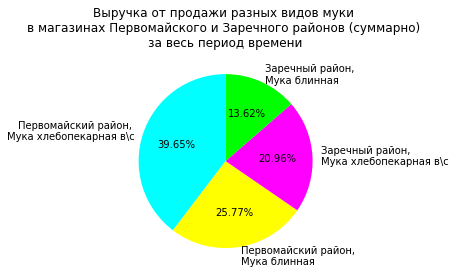

In [ ]:
labels_ = ['''Первомайский район, 
Мука хлебопекарная в\\с''', 
'''Первомайский район, 
Мука блинная''', 
'''Заречный район, 
Мука хлебопекарная в\\с''', 
'''Заречный район, 
Мука блинная''']
sections_ = [sum(pervomaisky_region_flour_1['Выручка']), sum(pervomaisky_region_flour_2['Выручка']), sum(zarechny_region_flour_1['Выручка']), sum(zarechny_region_flour_2['Выручка'])]
colors_ = [(0, 1, 1), (1, 1, 0), (1, 0, 1), (0, 1, 0)]

plt.pie(sections_, labels=labels_, colors=colors_,
        startangle=90,
        autopct='%1.2f%%')

plt.title('''Выручка от продажи разных видов муки 
в магазинах Первомайского и Заречного районов (суммарно) 
за весь период времени''')
plt.show()

## Пункт 3

3) постройте график изменения количества упаковок яиц диетических, имеющихся в наличии в магазинах Первомайского района, за период с 1 по 7 июня включительно

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

products_moving = pd.read_csv('3-1.csv', delimiter=';')
products = pd.read_csv('3-2.csv', delimiter=';')
shops = pd.read_csv('3-3.csv', delimiter=';')

Артикул яйца диетического

In [ ]:
products[products['Наименование товара'] == 'Яйцо диетическое']['Артикул']

14    15
Name: Артикул, dtype: int64

Список дат и магазинов Первомайского района

In [ ]:
list_of_dates = ['0' + str(i) + '.06.2021' for i in range(1, 8)]
shops_of_pervomaisky_region = ['M2', 'M4', 'M7', 'M8', 'M12', 'M13', 'M16']

Замена ID магазинов Первомайского района

In [ ]:
for shop in shops_of_pervomaisky_region:
  products_moving = products_moving.replace(shop, 'P')

Создание списка суммарного количества упаковок

In [ ]:
amount_of_egg_packings = []
for date_ in list_of_dates:
  products_moving_new = products_moving[products_moving['Дата'] == date_]
  products_moving_new = products_moving_new[products_moving_new['Артикул'] == 15]
  products_moving_new = products_moving_new[products_moving_new['ID магазина'] == 'P']
  products_moving_new_in = products_moving_new[products_moving_new['Тип операции'] == 'Поступление']
  amount_of_egg_packings.append(sum(products_moving_new_in['Количество упаковок, шт.']))

Создание графика

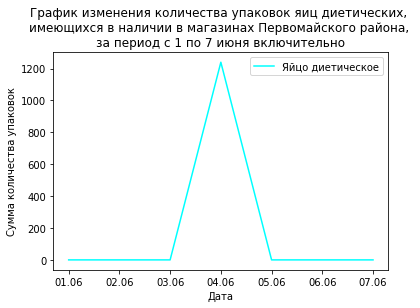

In [ ]:
list_of_dates_for_plot = [s[:5:] for s in list_of_dates]
plt.plot(list_of_dates_for_plot, amount_of_egg_packings, color='cyan', label='Яйцо диетическое')
plt.xlabel('Дата')
plt.ylabel('Сумма количества упаковок')
plt.title('''График изменения количества упаковок яиц диетических, 
имеющихся в наличии в магазинах Первомайского района, 
за период с 1 по 7 июня включительно''')
plt.legend()
plt.show()